# Fake Bills

This project uses a dataset from Kaggle (https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills). It contains data regarding whether or not a bill is real and its dimensions in millimeters as a rectangular shape:

Diagonal of bill <br>
Left side height <br>
Right side height <br>
Upper margin <br>
Lower margin <br>
Length <br>

We will analyze the dataset using the following techniques:

1. Creating distribution plots for each dimension
2. Creating correlation heatmaps to analyze a whether a bill is real or not vs the individual dimensions
3. Creating a logistic regression model that can be used to predict whether a bill is real or not given the dimensions as parameters

---

## 1) Import the necessary packages

In [1]:
#Import packages

import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
sns.set()

---

## 2) Load the data

In [2]:
#Load data file

fb = pd.read_csv('FakeBills.csv')
fb

,is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
0,True;171.81;104.86;104.95;4.52;2.89;112.83
1,True;171.46;103.36;103.66;3.77;2.99;113.09
2,True;172.69;104.48;103.5;4.4;2.94;113.16
3,True;171.36;103.91;103.94;3.62;3.01;113.51
4,True;171.73;104.28;103.46;4.04;3.48;112.54
...,...
1495,False;171.75;104.38;104.17;4.42;3.09;111.28
1496,False;172.19;104.63;104.44;5.27;3.37;110.97
1497,False;171.8;104.01;104.12;5.51;3.36;111.95
1498,False;172.06;104.28;104.06;5.17;3.46;112.25


We need to specify that the delimiter for this dataset is ";' to clean up spacing.

In [3]:
#Add delimiter specification:

fb = pd.read_csv('FakeBills.csv', delimiter = ';')
fb

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


We can see that the dataset is cleanly separated now.

---

## 3) Explore the dataset's structure

In this section we will look at the dataset's information including the number of rows it has, its columns and data types, and check for any missing data.

We will confirm the number of rows the dataset has.

In [4]:
#Confirm the dataset's total number of rows

len(fb)

1500

We can confirm that there are 1500 rows.

We will confirm the dataset's columns and its data types.

In [5]:
#Confirm the dataset's columns and its data type info

fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Looking at the output above, can confirm the column names and the type of data contained in each. However, the "margin_low" column appears to have only 1463 "non-null" data, which implies there are 37 null values in this particular column.

We will confirm that this is the case that there are 37 null values under "margin_low".

In [6]:
#Confirm if there are any null values within the dataset

fb.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

We can confirm that there are 37 null values under the "margin_low" column.

---

## 4) Clean the dataset

In this section, we will clean up the dataset accordingly for analysis.

First, we will rename the dataset's columns to suit readability preferences.

In [7]:
#Rename columns

fb1 = fb.copy()
fb1.rename(columns = {'is_genuine':'IsGenuine', 'diagonal':'Diagonal', 'height_left':'HeightLeft', 'height_right':'HeightRight', 'margin_low':'MarginLow', 'margin_up':'MarginUp', 'length':'Length'}, inplace = True)

In [8]:
fb1

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


Next, to proceed with the analyses, we will clean the dataset by removing the rows with null values.

In [9]:
#Remove rows with null values

fb2 = fb1.dropna(axis = 0)
fb2

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


We can confirm that the new dataset now has 1463 rows (after the 37 rows with null values have been removed).

In [10]:
#Confirm that there are now 1463 rows after removing the 37 null values.

len(fb2)

1463

The dataset now has 1463 rows (note that the index number on the dataset remains the same as the initial table).

Lastly, we will assign the cleaned dataset to a new variable "fbclean".

In [11]:
#Assign cleaned dataset to new variable

fbclean = fb2
fbclean

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


---

## 5) Explore the data

#### First, we will take a look at the dataset's statistical summary of its numerical values.

In [12]:
#Dataset's statistical summary

fbclean.describe()

,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


Here, we can see relevant statistical measures such as the range of the bills' dimensions and their averages.

#### We can also take a look at the dataset by separating out the real bills and the fake bills. We can create two separated datasets.

#### First, we will create a dataset of only real bills using the IsGenuine column, filtering for "True".

In [13]:
#Create a table of only real bills

fbcleanReal = fbclean[fbclean["IsGenuine"] == True]
fbcleanReal

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
995,True,171.66,103.92,103.47,4.26,2.83,113.20
996,True,172.16,103.72,103.61,4.30,2.72,113.51
997,True,171.78,103.38,104.22,4.23,3.07,113.77
998,True,171.44,103.96,103.92,3.68,2.89,113.21


We will confirm the number of rows the real bills table has.

In [14]:
#Confirm the number of rows the real bills table has

len(fbcleanReal)

971

#### Next, we will create a dataset of only fake bills using the IsGenuine column, filtering for "False".

In [15]:
#Create a table of only fake bills

fbcleanFake = fbclean[fbclean["IsGenuine"] == False]
fbcleanFake

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


We will confirm the number of rows the fake bills table has.

In [16]:
#Confirm the number of rows the fake bills table has

len(fbcleanFake)

492

We can confirm that the number of rows the real bills table has combined with the number of rows the fake bills table has adds up to the total number of rows the cleaned dataset has: 971 + 492 = 1463.

#### We can take a look at the statistical summary of each separted dataset.

In [17]:
#Genuine bills statistical summary:

fbcleanReal.describe()

,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,171.988476,103.951679,103.809094,4.116097,3.052544,113.203059
std,0.301402,0.301518,0.288862,0.319124,0.185425,0.356123
min,171.040000,103.140000,102.910000,2.980000,2.270000,111.760000
25%,171.790000,103.745000,103.610000,3.905000,2.925000,112.960000
50%,171.990000,103.950000,103.810000,4.110000,3.050000,113.200000
75%,172.200000,104.140000,104.000000,4.340000,3.180000,113.460000
max,172.920000,104.860000,104.950000,5.040000,3.740000,114.320000


In [18]:
#Fake bills statistical summary:

fbcleanFake.describe()

,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,171.901402,104.188537,104.143272,5.215935,3.351504,111.632114
std,0.305473,0.224418,0.271683,0.553531,0.179343,0.615343
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.697500,104.040000,103.950000,4.840000,3.227500,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.330000,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


<b> Looking at the averages of each dimensions, we can make observations: </b>

<b>Diagonal</b>: The real bills have a longer diagonal average by about 0.09mm. <br>
<b>Left Height</b> : The real bills have a shorter left height average by about 0.24mm. <br>
<b>Right Height</b>: The real bills have a shorter right height average by about 0.33mm. <br>
<b>Lower Margin</b>: The real bills have a shorter lower margin average by about 1.11mm. <br>
<b>Upper Margin</b>: The real bills have a shorter upper margin average by about 0.30mm. <br>
<b>Length</b>: The real bills have a longer length by about 1.57mm.

---

## 6) Distribution Plots

Next, we will visualize the distribution plots of each dimensions. 

First, we will take a look at the dimension's distribution using the overall dataset. 

Then, we will take a look at the dimension's distribution separated by the real and fake bills datasets.

#### Diagonal Distribution Plots

#### Diagonal Distribution Plot Using The Overall Dataset:

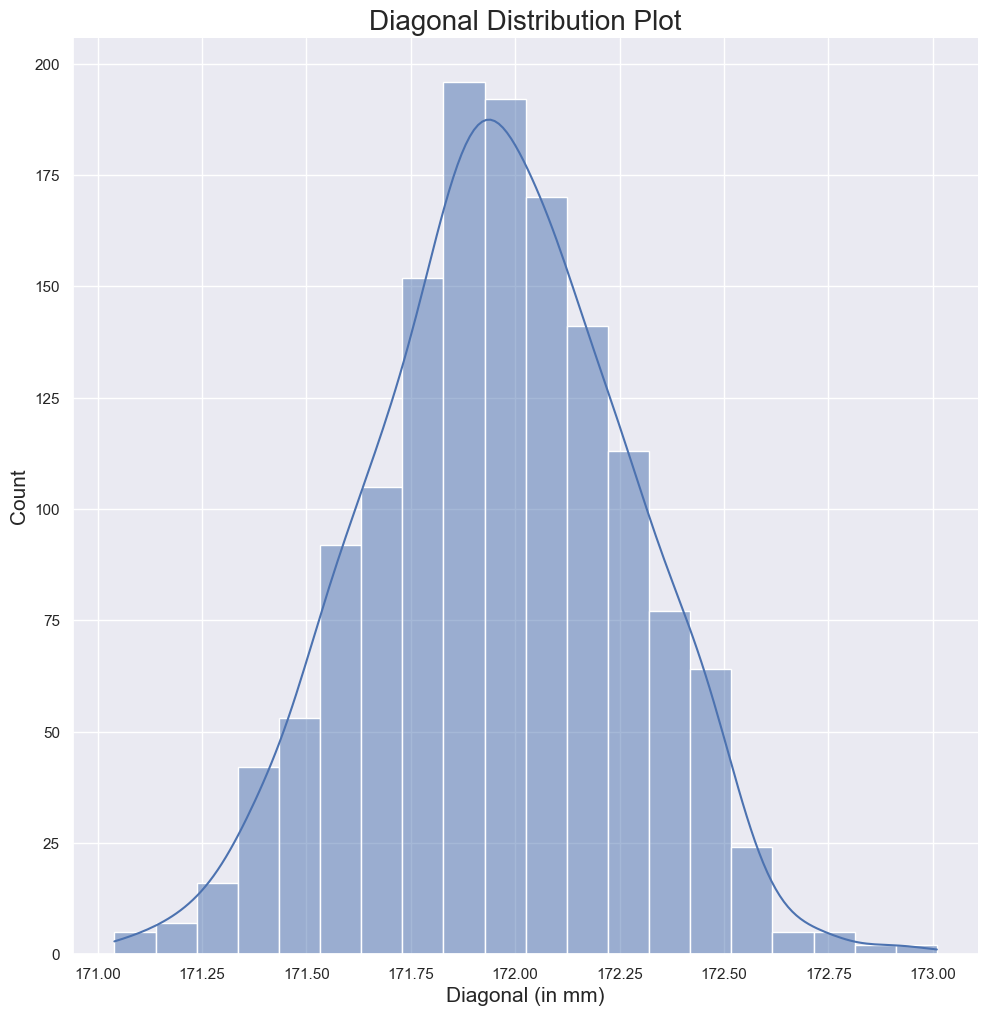

In [19]:
#Diagonal Distribution Plot with Overall Dataset

sns.displot(fbclean.Diagonal, height = 10, bins = 20, kde = True)
plt.title('Diagonal Distribution Plot', fontsize = 20)
plt.xlabel('Diagonal (in mm)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The diagonal follows a normal distribution, ranging from 171mm to 173mm.

#### Diagonal Distribution Using the Real and Fake Bill Datasets:

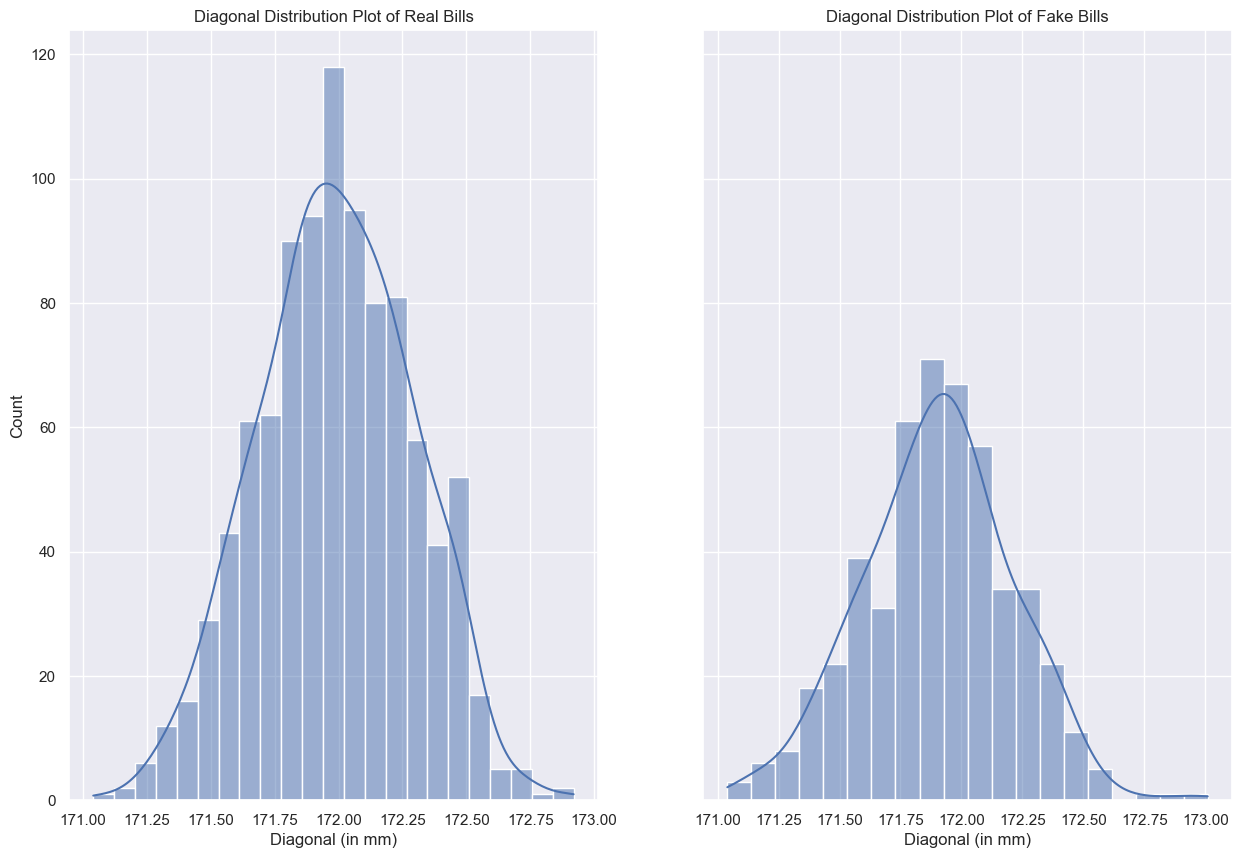

In [20]:
#Diagonal Distribution of Real and Fake Bills

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 10))

sns.histplot(ax = axes[0], data = fbcleanReal.Diagonal, kde = True)
axes[0].set_title('Diagonal Distribution Plot of Real Bills')
axes[0].set_xlabel("Diagonal (in mm)")

sns.histplot(ax = axes[1], data = fbcleanFake.Diagonal, kde = True)
axes[1].set_title('Diagonal Distribution Plot of Fake Bills')
axes[1].set_xlabel("Diagonal (in mm)")

plt.show()

After splitting the real and fake bill dataset, we can see that both diagonal measures still follow a normal distribution, ranging from 171mm to 173mm. It's possible that the diagonal measure may not be significant in differentiating real and fake bills.

#### Left Height Distribution Plots

#### Left Height Distribution Plot Using The Overall Dataset:

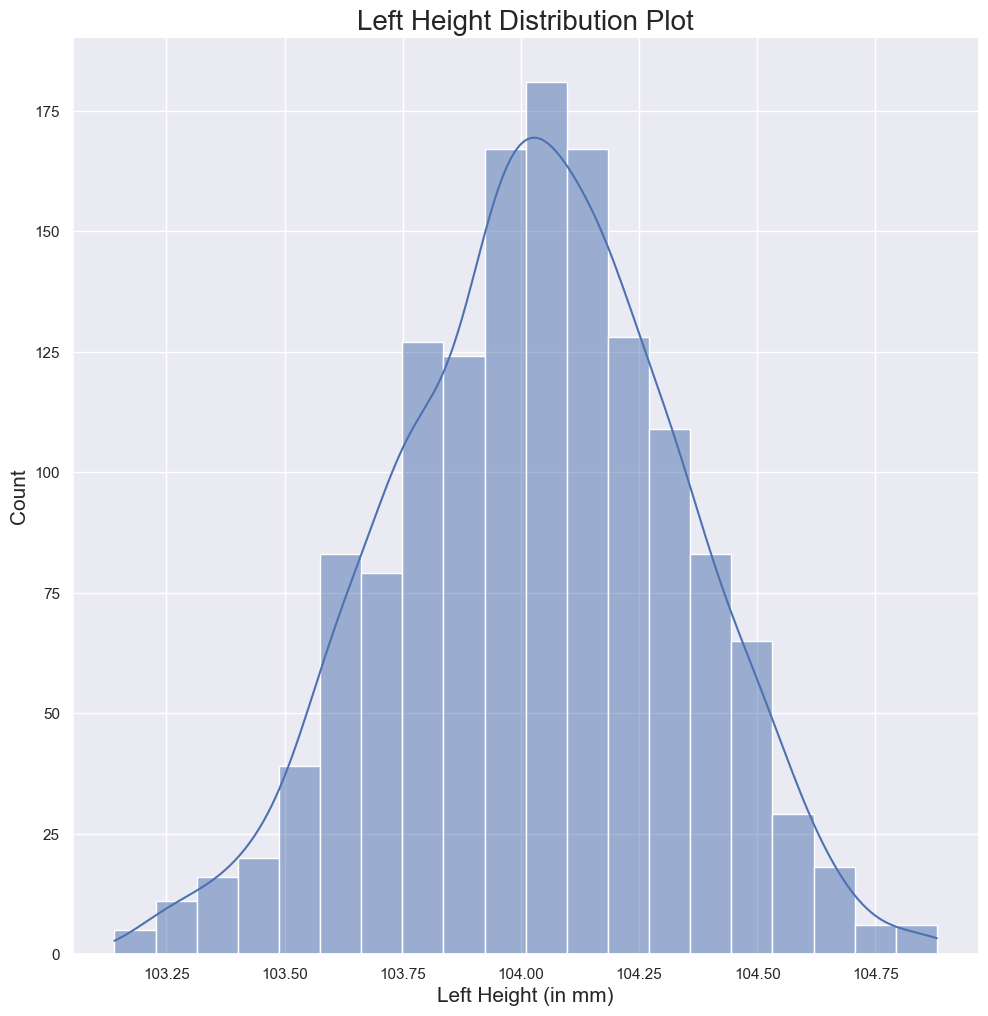

In [21]:
#Left Height Distribution Plot with Overall Dataset

sns.displot(fbclean.HeightLeft, height = 10, bins = 20, kde = True)
plt.title('Left Height Distribution Plot', fontsize = 20)
plt.xlabel('Left Height (in mm)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The left height follows a normal distribution, ranging from around 103 to 105 mm.

#### Left Height Distribution Using the Real and Fake Bill Datasets:

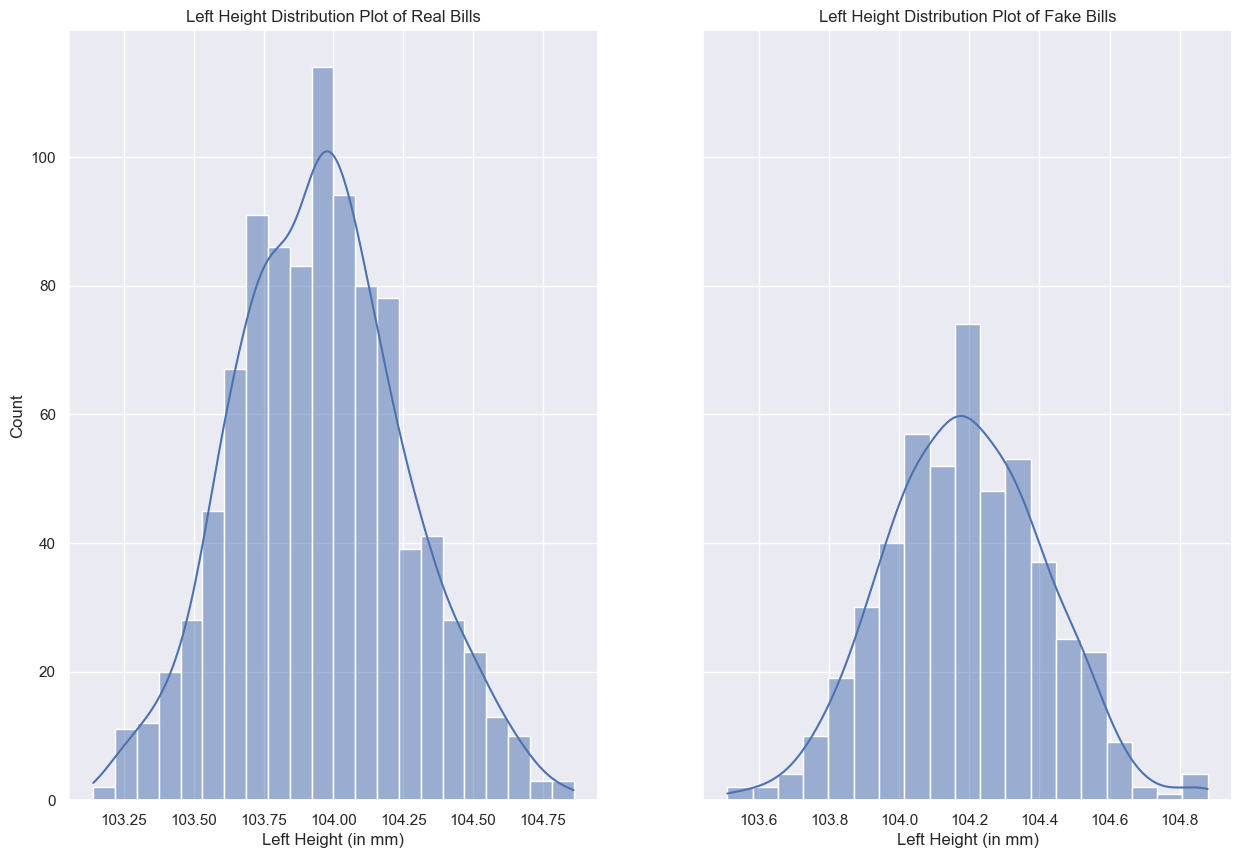

In [22]:
#Left Height Distribution of Real and Fake Bills

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 10))

sns.histplot(ax = axes[0], data = fbcleanReal.HeightLeft, kde = True)
axes[0].set_title('Left Height Distribution Plot of Real Bills')
axes[0].set_xlabel("Left Height (in mm)")

sns.histplot(ax = axes[1], data = fbcleanFake.HeightLeft, kde = True)
axes[1].set_title('Left Height Distribution Plot of Fake Bills')
axes[1].set_xlabel("Left Height (in mm)")

plt.show()

After splitting the real and fake bill dataset, we can see that both left height measures still follow a normal distribution, both ranging from around 103 to 105mm. It's possible that the left height measure may not be significant in differentiating real and fake bills.

#### Right Height Distribution Plots

#### Right Height Distribution Plot Using The Overall Dataset:

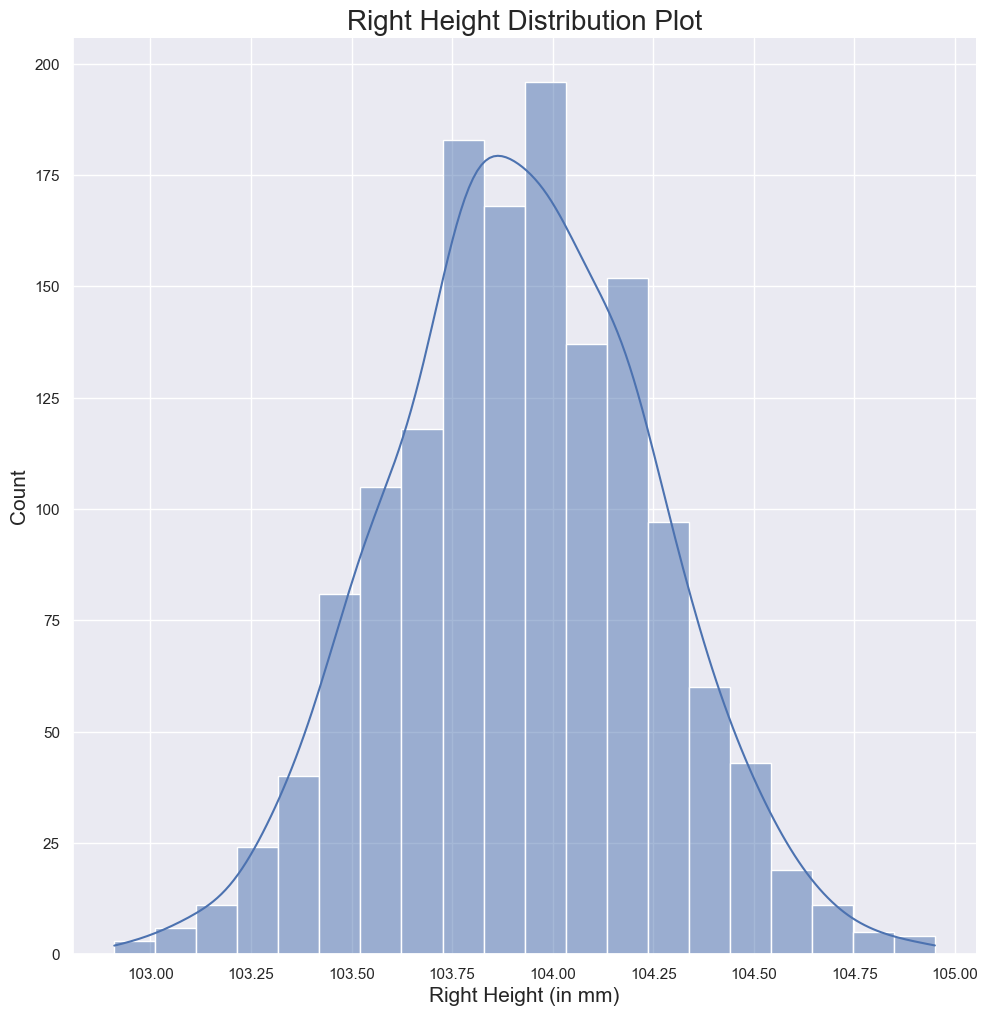

In [23]:
#Right Height Distribution Plot with Overall Dataset

sns.displot(fbclean.HeightRight, height = 10, bins = 20, kde = True)
plt.title('Right Height Distribution Plot', fontsize = 20)
plt.xlabel('Right Height (in mm)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The right height follows a normal distribution, ranging from around 103 to 105 mm.

#### Right Height Distribution Using the Real and Fake Bill Datasets:

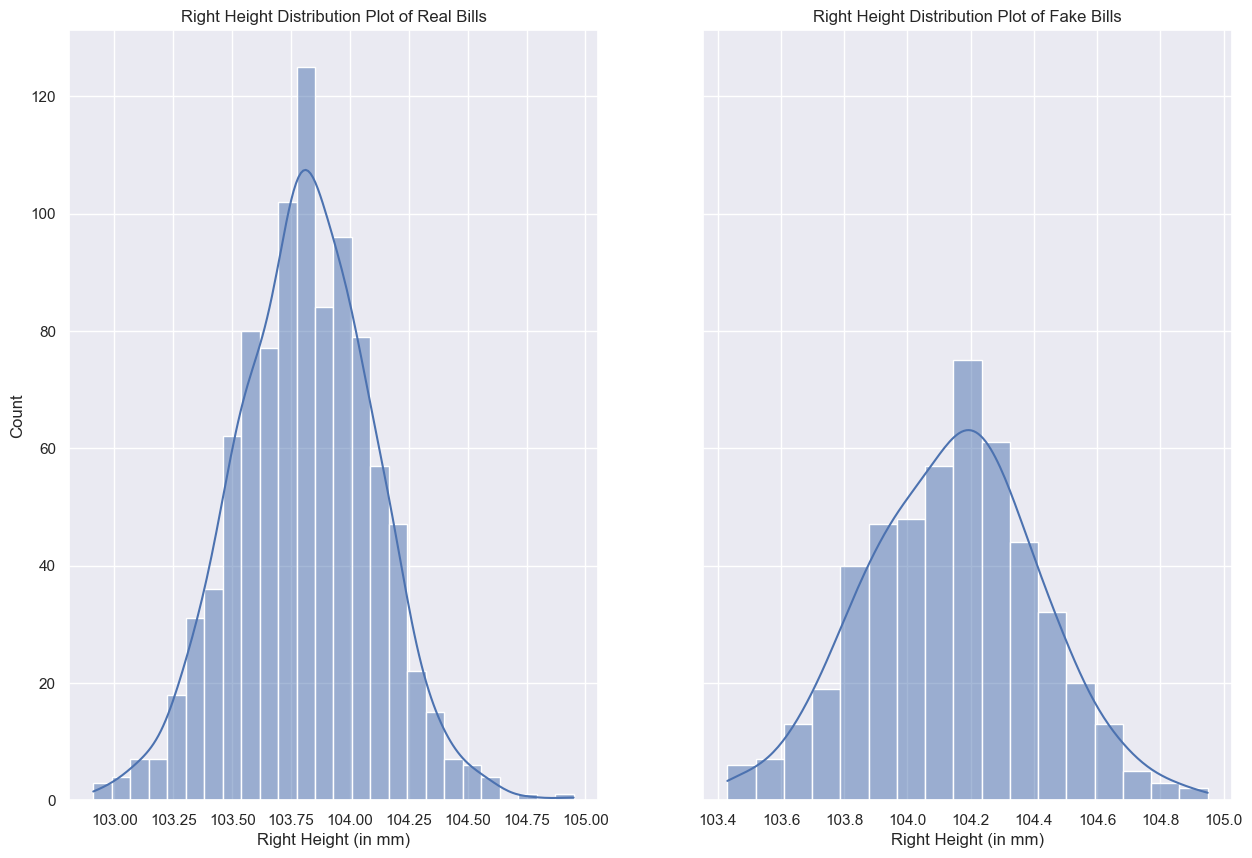

In [24]:
#Right Height Distribution of Real and Fake Bills

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 10))

sns.histplot(ax = axes[0], data = fbcleanReal.HeightRight, kde = True)
axes[0].set_title('Right Height Distribution Plot of Real Bills')
axes[0].set_xlabel("Right Height (in mm)")

sns.histplot(ax = axes[1], data = fbcleanFake.HeightRight, kde = True)
axes[1].set_title('Right Height Distribution Plot of Fake Bills')
axes[1].set_xlabel("Right Height (in mm)")

plt.show()

After splitting the real and fake bill dataset, we can see that both right measures still follow a normal distribution, both ranging from around 103 to 105mm. It's possible that the right height measure may not be significant in differentiating real and fake bills.

#### Lower Margin Distribution Plots

#### Lower Margin Distribution Plot Using The Overall Dataset:

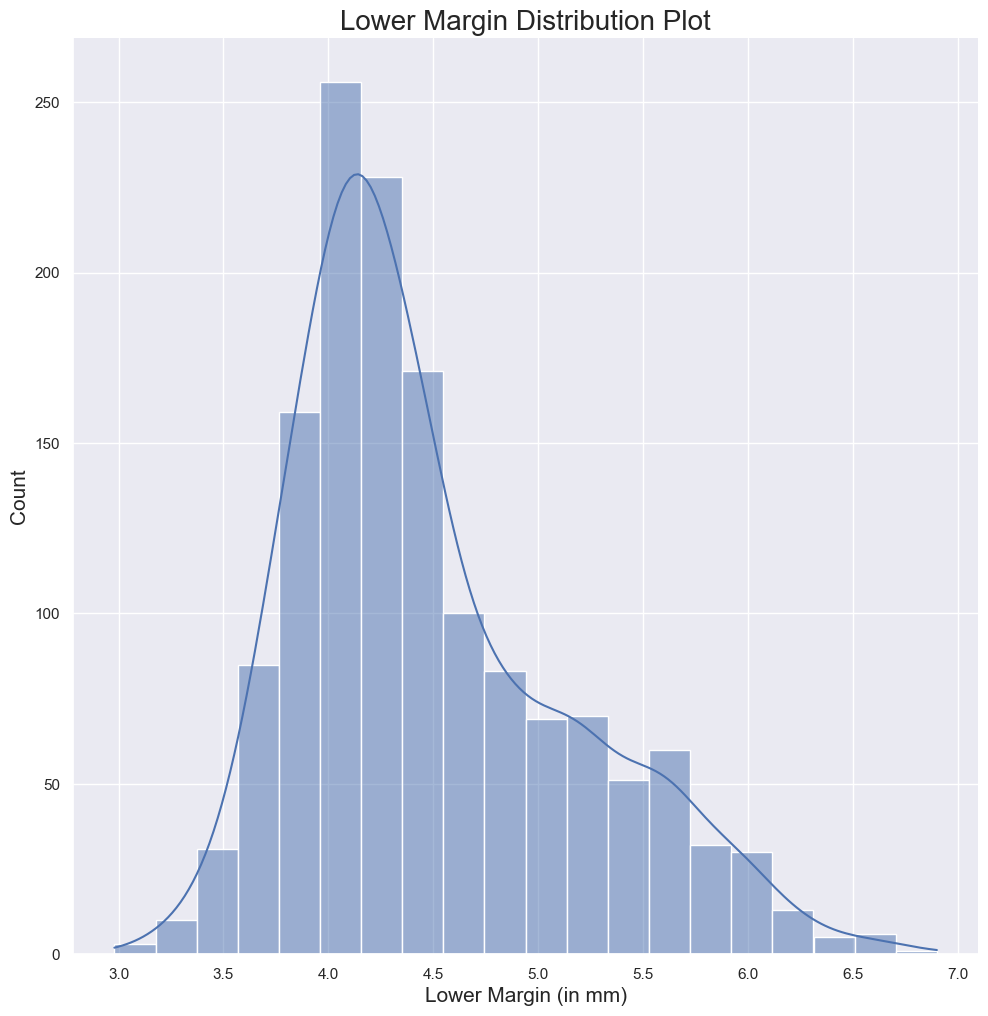

In [25]:
#Lower Margin Distribution Plot with Overall Dataset

sns.displot(fbclean.MarginLow, height = 10, bins = 20, kde = True)
plt.title('Lower Margin Distribution Plot', fontsize = 20)
plt.xlabel('Lower Margin (in mm)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The lower margin follows a right-skew distribution, ranging from 3 to 7mm. Most fall under 4.0 to 4.5mm.

#### Lower Margin Distribution Using the Real and Fake Bill Datasets:

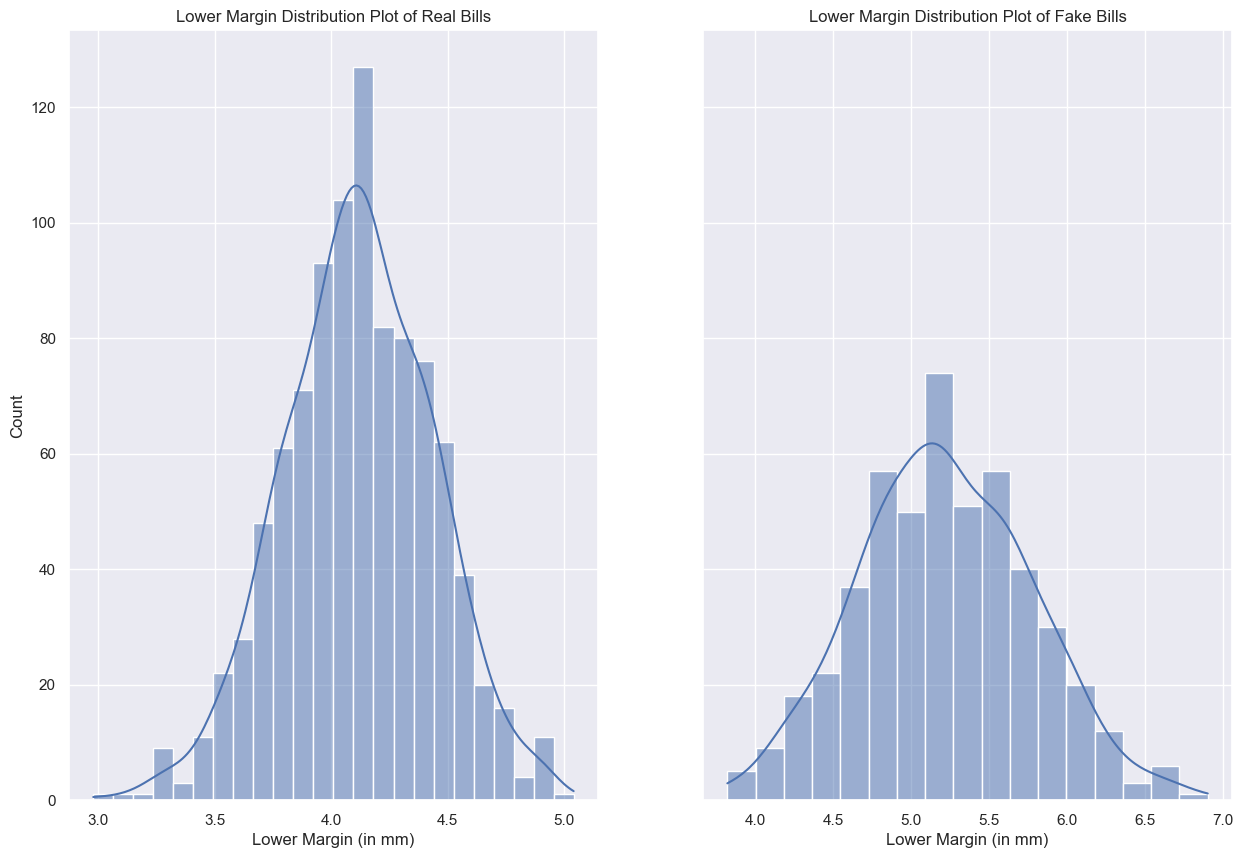

In [26]:
#Lower Margin Distribution of Real and Fake Bills

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 10))

sns.histplot(ax = axes[0], data = fbcleanReal.MarginLow, kde = True)
axes[0].set_title('Lower Margin Distribution Plot of Real Bills')
axes[0].set_xlabel("Lower Margin (in mm)")

sns.histplot(ax = axes[1], data = fbcleanFake.MarginLow, kde = True)
axes[1].set_title('Lower Margin Distribution Plot of Fake Bills')
axes[1].set_xlabel("Lower Margin (in mm)")

plt.show()

After splitting the real and fake bill dataset, we can see that the both plots now follow a normal distribution. The lower margin of real bills have a range from 3 to 5mm while the lower margin of fake bills have a range from 4 to 7mm. It seems that real bills tend to have a shorter lower margin than fake bills based on these distributions.

#### Upper Margin Distribution Plots

#### Upper Margin Distribution Plot Using The Overall Dataset:

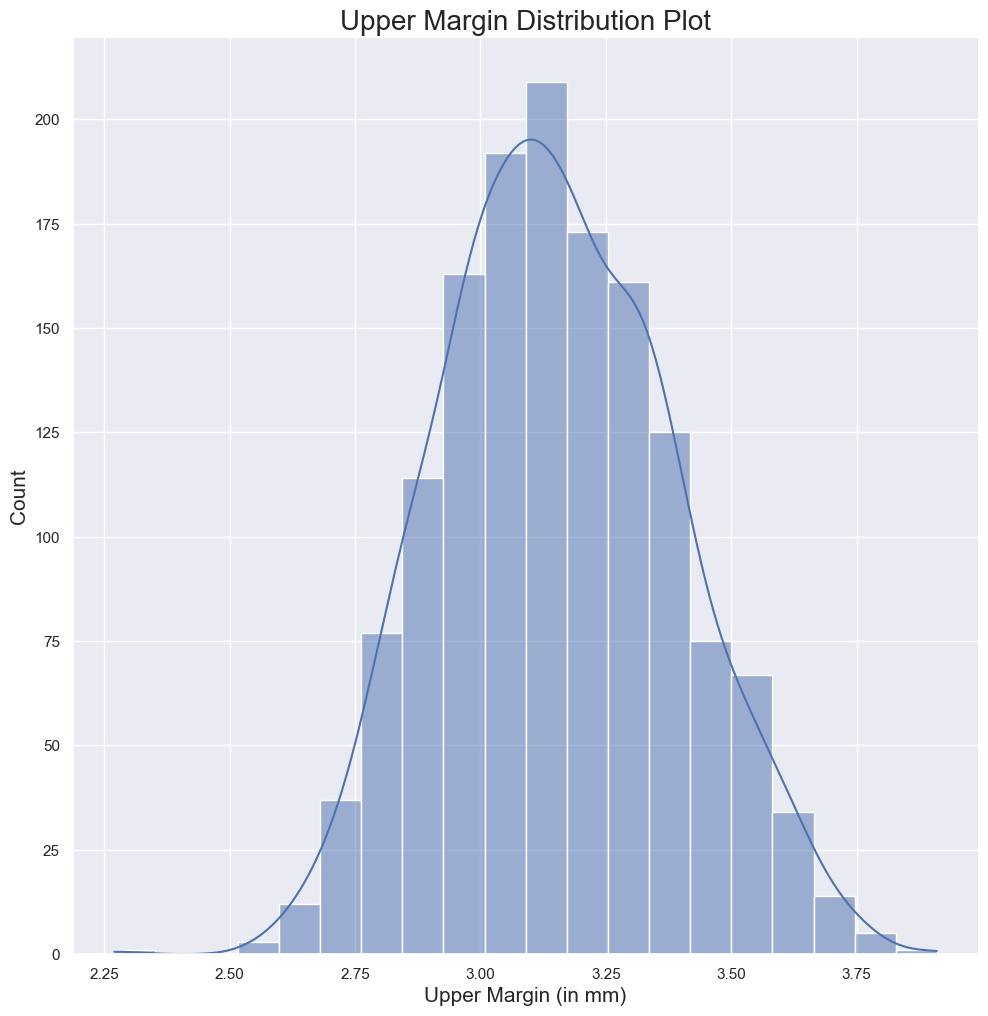

In [27]:
#Upper Margin Distribution Plot with Overall Dataset

sns.displot(fbclean.MarginUp, height = 10, bins = 20, kde = True)
plt.title('Upper Margin Distribution Plot', fontsize = 20)
plt.xlabel('Upper Margin (in mm)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The upper margin follows a normal distribution, ranging from around 2.25 to 3.8mm.

#### Upper Margin Distribution Using the Real and Fake Bill Datasets:

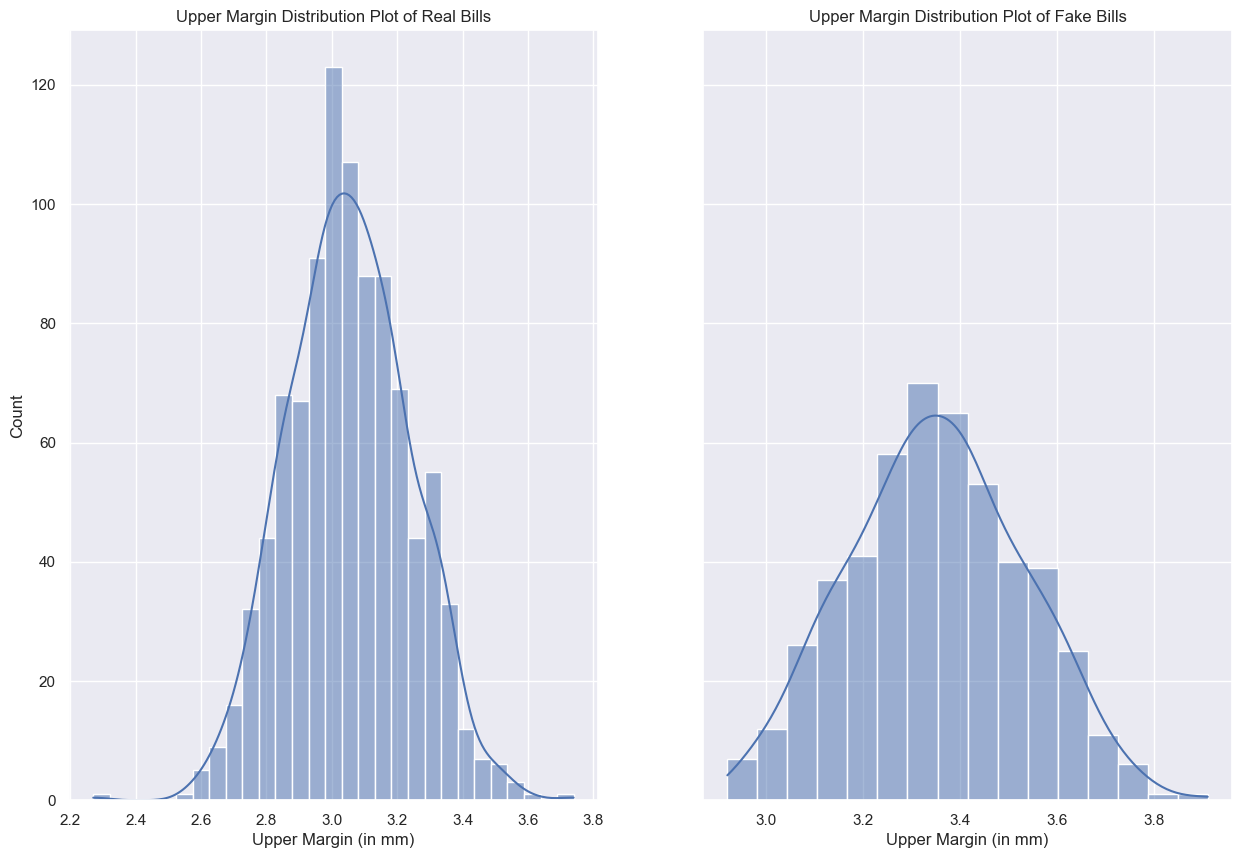

In [28]:
#Upper Margin Distribution of Real and Fake Bills

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 10))

sns.histplot(ax = axes[0], data = fbcleanReal.MarginUp, kde = True)
axes[0].set_title('Upper Margin Distribution Plot of Real Bills')
axes[0].set_xlabel("Upper Margin (in mm)")

sns.histplot(ax = axes[1], data = fbcleanFake.MarginUp, kde = True)
axes[1].set_title('Upper Margin Distribution Plot of Fake Bills')
axes[1].set_xlabel("Upper Margin (in mm)")

plt.show()

After splitting the real and fake bill dataset, we can see that both plots still follow a normal distribution. However, the upper margin of the real bills have a range from around 2.2 to 3.8mm while the upper margin of the fake bills have a more compact range from around 2.9 to 3.8mm. It seems that real bills tend to have a shorter upper margin than fake bills based on these distributions.

#### Length Distribution Plots

#### Length Distribution Plot Using The Overall Dataset:

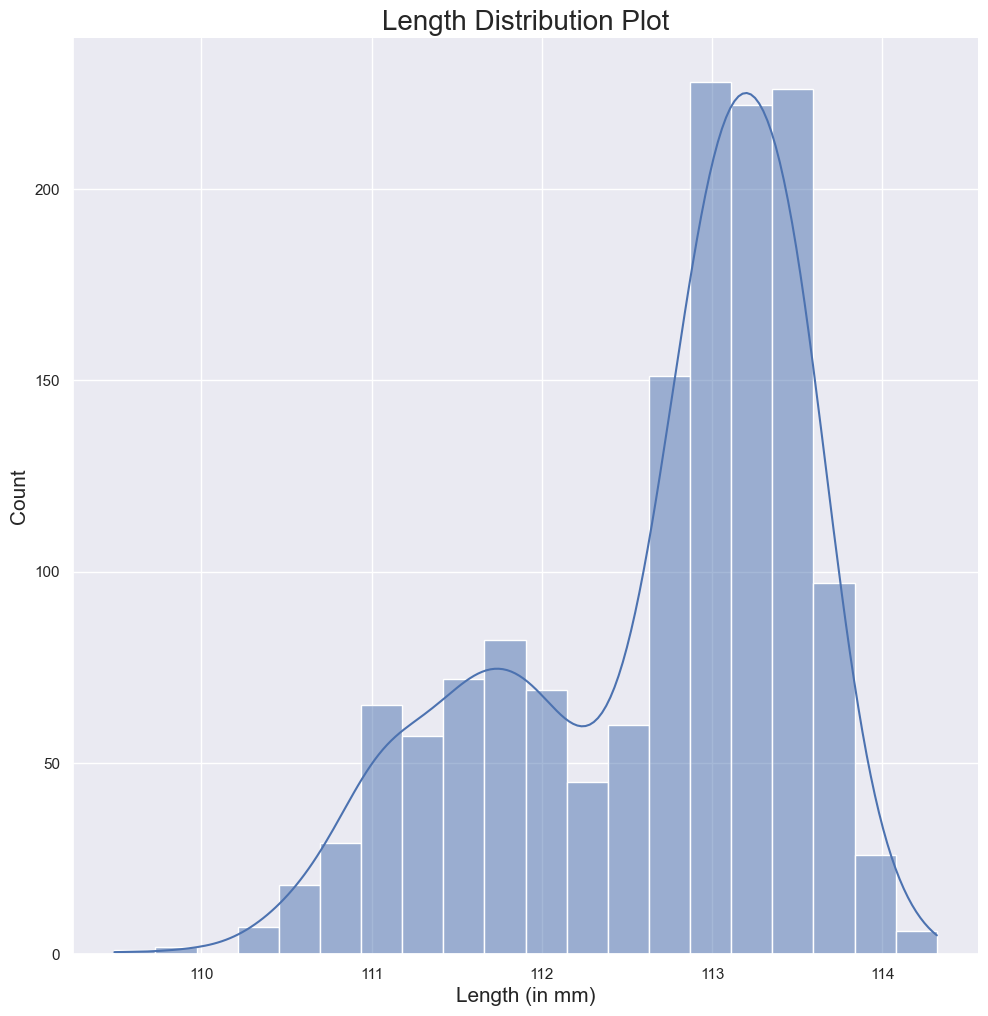

In [29]:
#Length Distribution Plot with Overall Dataset

sns.displot(fbclean.Length, height = 10, bins = 20, kde = True)
plt.title('Length Distribution Plot', fontsize = 20)
plt.xlabel('Length (in mm)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The length measure follows a left-skew distribution, ranging from around 110 to 114mm.

#### Length Distribution Using the Real and Fake Bill Datasets:

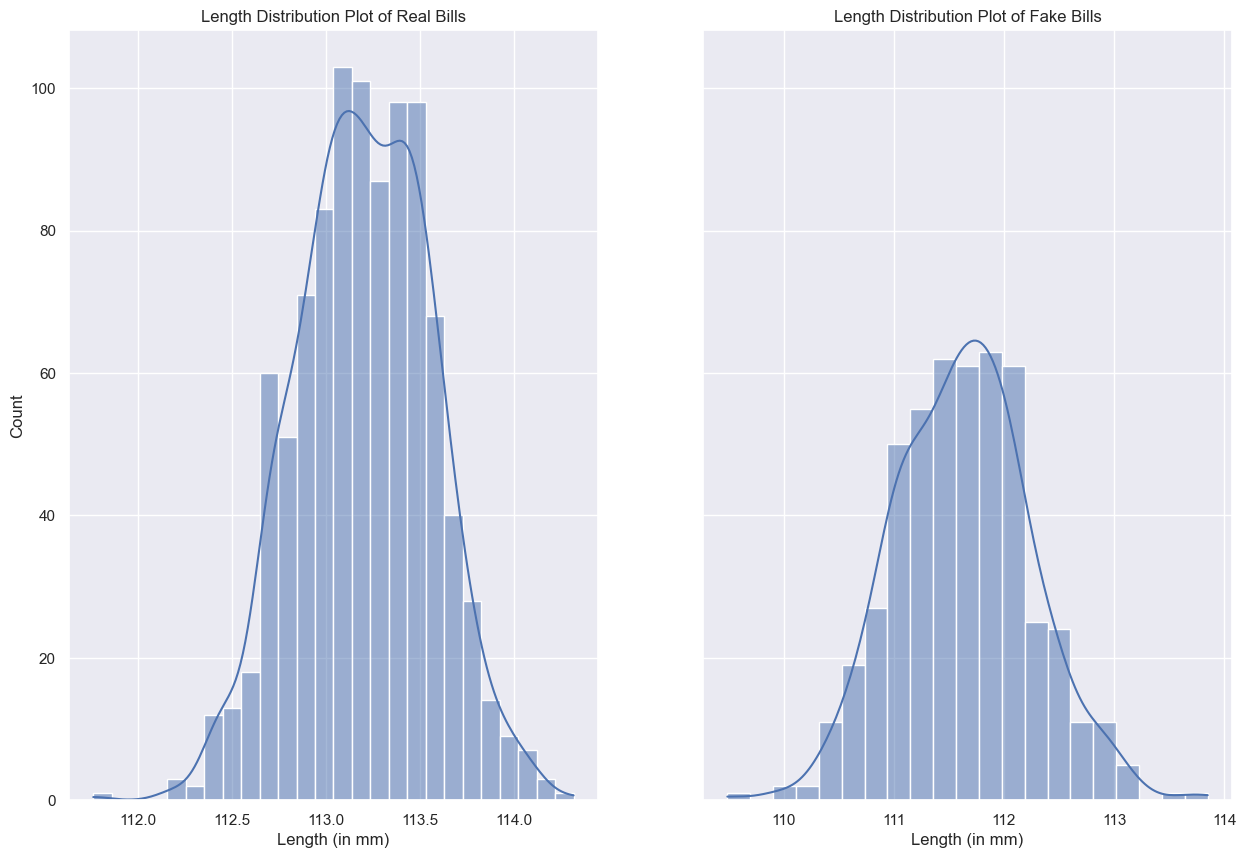

In [30]:
#Length Distribution of Real and Fake Bills

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 10))

sns.histplot(ax = axes[0], data = fbcleanReal.Length, kde = True)
axes[0].set_title('Length Distribution Plot of Real Bills')
axes[0].set_xlabel("Length (in mm)")

sns.histplot(ax = axes[1], data = fbcleanFake.Length, kde = True)
axes[1].set_title('Length Distribution Plot of Fake Bills')
axes[1].set_xlabel("Length (in mm)")

plt.show()

After splitting the real and fake bill dataset, we can see that both plots now roughly follow a normal distribution. However, the length of the real bills have a range from around 112 to 114mm while the length of the fake bills have a range from around 110 to 114mm. It seems that real bills tend to have a longer length than fake bills based on these distributions.

---

## 7) Correlation Heatmaps

We will analyze the correlation between whether a bill is real or not and each combination of the bill dimensions using correlation heatmaps. We will look at the heatmaps for the overall dataset, real bills dataset, and fake bills dataset.

Note that correlation numbers range from -1 to 1:
 - -1 indicates a perfect negative correlation between two variables
 - 0 indicates no correlation betweent two variables
 - 1 indicates a perfect positive correlation between two variables

#### First, we will update the 3 datasets (overall, real, fake) so that their "IsGenuine" column reflects the binary number 0 and 1. 0 is False and 1 is True.

1. Update the overall dataset

In [31]:
#Update the overall dataset

fbcleanbinary = fbclean.copy()
fbcleanbinary["IsGenuine"] = fbcleanbinary["IsGenuine"].astype(int)
fbcleanbinary

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


2. Update the real bills dataset

In [32]:
#Update the real bills dataset

fbcleanbinaryReal = fbcleanbinary[fbcleanbinary["IsGenuine"] == True]
fbcleanbinaryReal

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
995,1,171.66,103.92,103.47,4.26,2.83,113.20
996,1,172.16,103.72,103.61,4.30,2.72,113.51
997,1,171.78,103.38,104.22,4.23,3.07,113.77
998,1,171.44,103.96,103.92,3.68,2.89,113.21


3. Update the fake bills dataset

In [33]:
#Update the fake bills dataset

fbcleanbinaryFake = fbcleanbinary[fbcleanbinary["IsGenuine"] == False]
fbcleanbinaryFake

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
1000,0,172.28,103.95,103.91,4.78,3.31,111.40
1001,0,171.92,103.86,104.30,4.96,3.13,111.29
1002,0,171.59,104.14,104.38,4.97,3.47,111.22
1003,0,172.02,104.33,104.33,5.19,3.21,111.99
1004,0,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


#### Now, we will plot the correlation heatmaps.

#### 1. Correlation Heatmap Using Overall Dataset

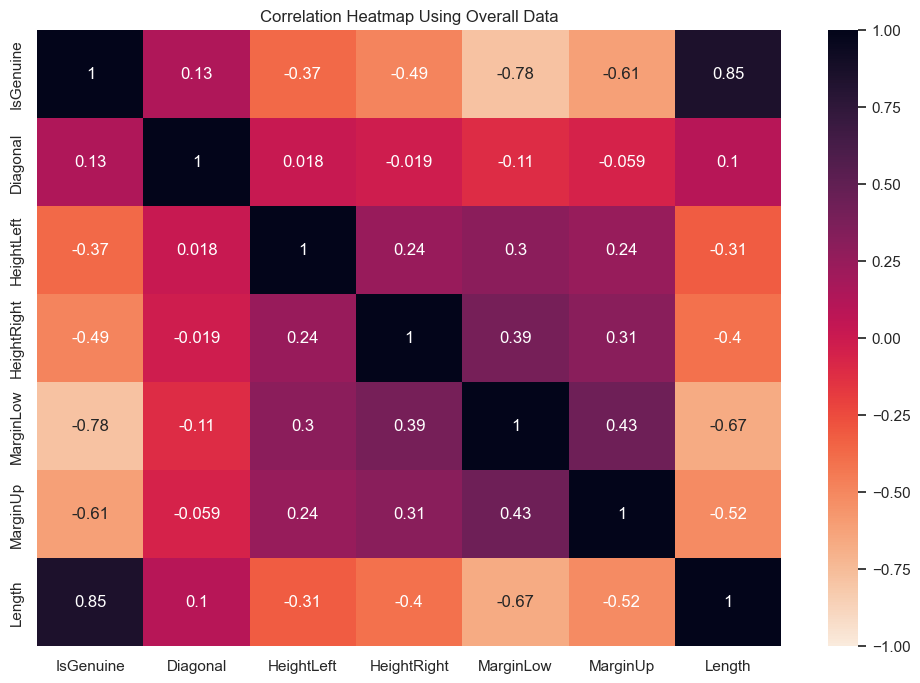

In [34]:
#Plot the correlation heatmap using the overall dataset

plt.figure(figsize = (12, 8))
heatmap1 = sns.heatmap(fbcleanbinary.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'rocket_r')
heatmap1.set_title('Correlation Heatmap Using Overall Data')
plt.show()

We can make the following observations:

<b>Diagonal:</b> Small positive correlation with real bills <br>
<b>Left Height:</b> Small negative correlation with real bills <br>
<b>Right Height:</b> Small negative correlation with real bills <br>
<b>Lower Margin:</b> Strong negative correlation with real bills (-0.78) <br>
<b>Upper Margin:</b> Strong negative correlation with real bills (-0.61)<br>
<b>Length:</b> Strong positive correlation with real bills (0.85)

#### 2) Correlation Heatmap Using Real Bills Dataset

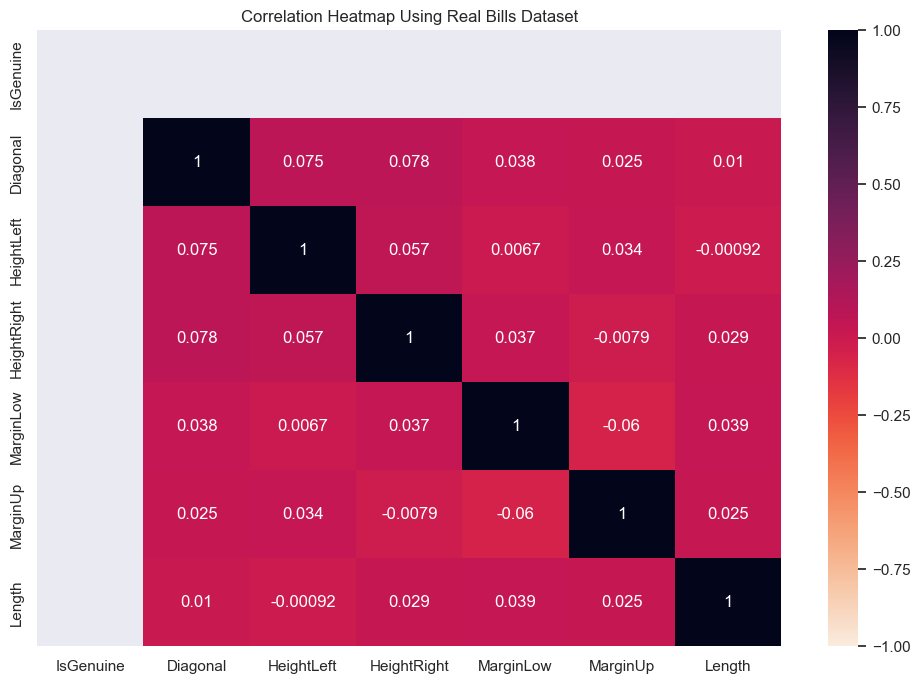

In [35]:
#Plot the correlation heatmap using the real bills dataset

plt.figure(figsize = (12, 8))
heatmap2 = sns.heatmap(fbcleanbinaryReal.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'rocket_r')
heatmap2.set_title('Correlation Heatmap Using Real Bills Dataset')
plt.show()

Based on the real bills dataset, there are no strong correlations between the dimensions.

#### 3) Correlation Heatmap Using Fake Bills Dataset

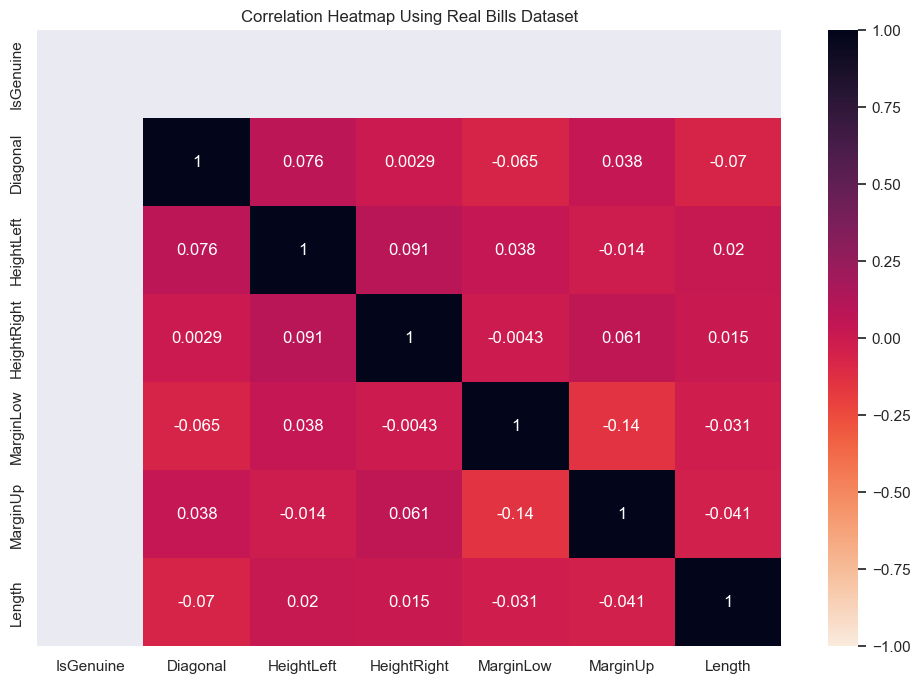

In [36]:
#Plot the correlation heatmap using the real bills dataset

plt.figure(figsize = (12, 8))
heatmap3 = sns.heatmap(fbcleanbinaryFake.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'rocket_r')
heatmap3.set_title('Correlation Heatmap Using Real Bills Dataset')
plt.show()

Based on the fake bills dataset, there are also no strong correlations between the dimensions.

---

## 8) Logistic Regression Plots

In this section, we will plot the data using logistic regressions. These regressions show a probability function of whether a bill is real or not (0 for fake bills, 1 for real bills) using the dimensions as individual parameters.

We will use the "fbcleanbinary" dataset created in the last section that defines real bills as "1" and fake bills defined as "0".

In [37]:
#Use the "fbcleanbinary" to start

fbcleanbinary

,IsGenuine,Diagonal,HeightLeft,HeightRight,MarginLow,MarginUp,Length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


Next, we will define our dependent variable (y) and independent variables (x).

In [38]:
#Dependent Variable
y = fbcleanbinary['IsGenuine']


#We will create a dataframe "x0" that will contain all of the independent variables aggregated as an array
x0 = fbcleanbinary[['Diagonal', 'HeightLeft', 'HeightRight', 'MarginLow', 'MarginUp', 'Length']]


#We will also create individual arrays of each dimensional measure
x1 = fbclean['Diagonal']
x2 = fbclean['HeightLeft']
x3 = fbclean['HeightRight']
x4 = fbclean['MarginLow']
x5 = fbclean['MarginUp']
x6 = fbclean['Length']

Next, we will plot each individual independent variable as a logistic regression of whether a bill is real or not.

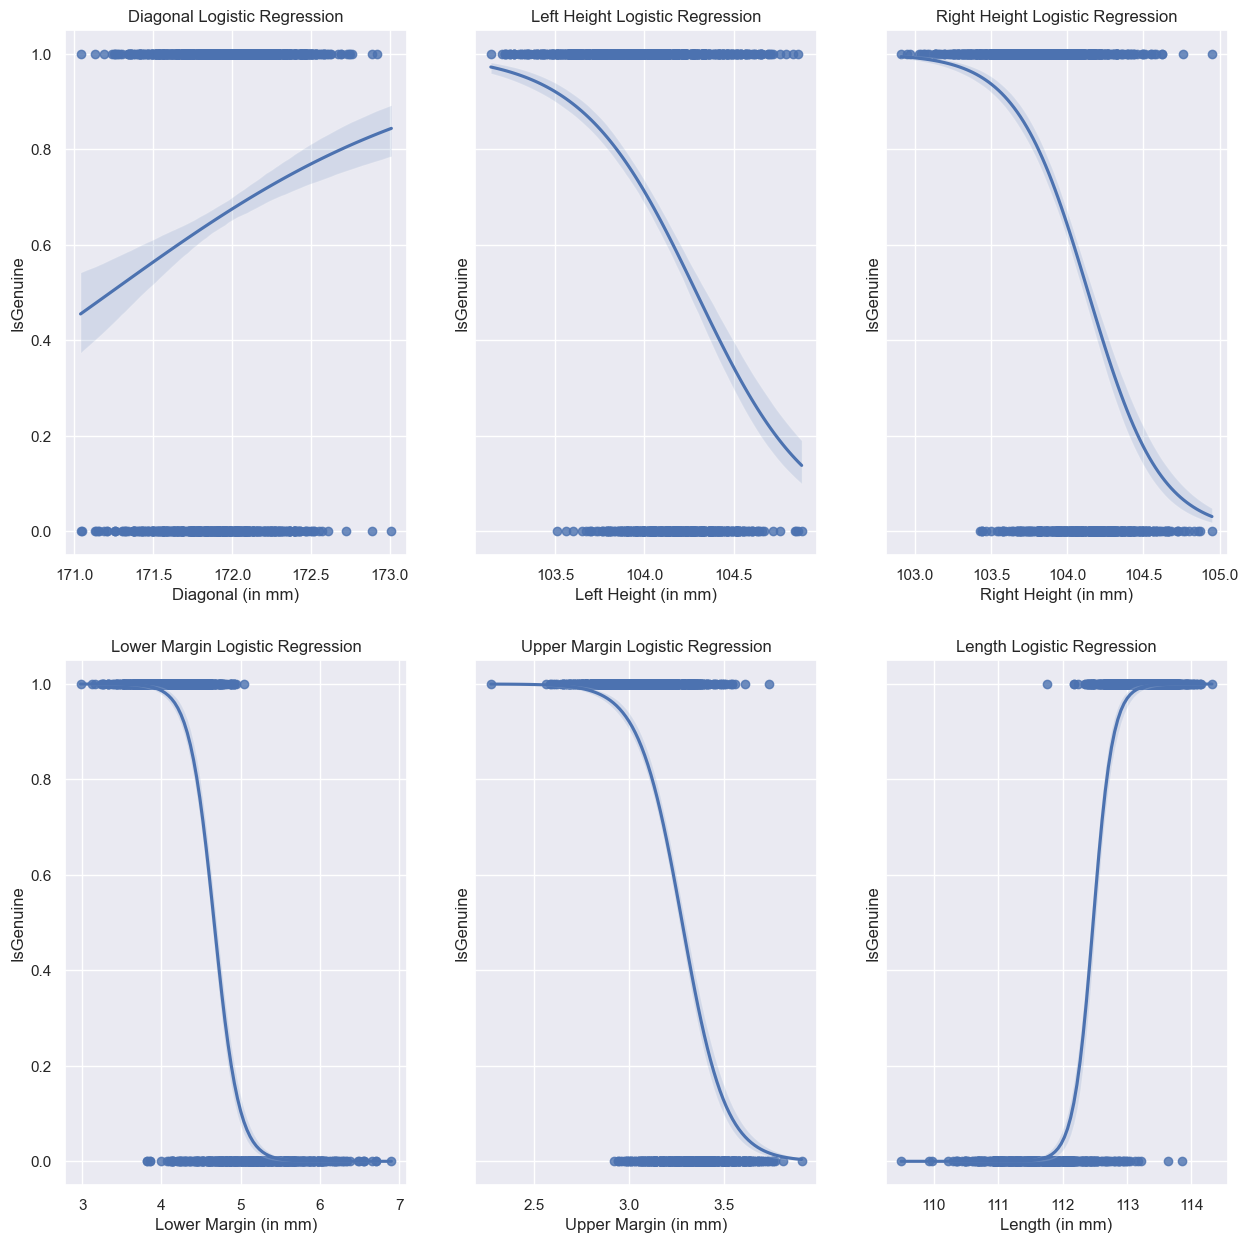

In [39]:
#Create the structure for the subplots

fig, axes = plt.subplots(2, 3, sharey = True, figsize = (15, 15))


#Create the subplots

sns.regplot(ax = axes[0, 0], x = x1, y = y, data = fbcleanbinary, logistic = True)
axes[0, 0].set_title('Diagonal Logistic Regression')
axes[0, 0].set_xlabel("Diagonal (in mm)")

sns.regplot(ax = axes[0, 1], x = x2, y = y, data = fbcleanbinary, logistic = True)
axes[0, 1].set_title('Left Height Logistic Regression')
axes[0, 1].set_xlabel("Left Height (in mm)")

sns.regplot(ax = axes[0, 2], x = x3, y = y, data = fbcleanbinary, logistic = True)
axes[0, 2].set_title('Right Height Logistic Regression')
axes[0, 2].set_xlabel("Right Height (in mm)")

sns.regplot(ax = axes[1, 0], x = x4, y = y, data = fbcleanbinary, logistic = True)
axes[1, 0].set_title('Lower Margin Logistic Regression')
axes[1, 0].set_xlabel("Lower Margin (in mm)")

sns.regplot(ax = axes[1, 1], x = x5, y = y, data = fbcleanbinary, logistic = True)
axes[1, 1].set_title('Upper Margin Logistic Regression')
axes[1, 1].set_xlabel("Upper Margin (in mm)")

sns.regplot(ax = axes[1, 2], x = x6, y = y, data = fbcleanbinary, logistic = True)
axes[1, 2].set_title('Length Logistic Regression')
axes[1, 2].set_xlabel("Length (in mm)")


plt.show()

Based on the plots above, we can make the following observations:

1. <b>Diagonal:</b> The logistic regression plot line shows an increasing function with a range of about 0.4 to 0.8 as the diagonal increases from 171 to 173mm. This means that as we move along the diagonal measure from 171 to 173mm, the odds of the bill being real increases from 40% at 171mm to 80% at 173mm. However, this range of probability indicates that the diagaonal may not be a good predictor of whether a bill is real or not, which is consistent with our distirbution plot and heatmap analysis of the diagonal.<br><br>

2. <b>Left Height:</b> The logistic regression plot line shows a decreasing function with a range of about 1.0 to 0.1 as the left height increases from about 103mm to 105mm. This means that as we move along the left height measure from 103 to 105mm, the odds of the bill being real decreases from 100% at 102mm to 10% at 105mm. It appears that real bills have a shorter left height than fake bills.<br><br>

3. <b>Right Height:</b> The logistic regression plot line shows an increasing function with a range of about 1.0 to 0.0 as the right height increases from about 103mm to 105mm. This means that as we move along the right height measure from 102 to 105mm, the odds of the bill being real decreases from 100% at 103mm to almost 0% at 105mm. It appears that real bills have a shorter right height than fake bills.<br><br>

4. <b>Lower Margin:</b> The logistic regression plot line shows a decreasing function with a range of about 1.0 to 0.0 as the lower margin increases from about 3mm to 7mm. This means that as we move along the lower margin measure from 3mm to 7mm, the odds of the bill being real decreases from 100% at 103mm to 0% at 107mm. We can see that the variability in probability is between a lower margin measure of about 4mm to 5.3mm as this where the two scatterplots overlap. This regression is consistent with our distribution plot and heatmap analysis in that real bills tend to have a shorter lower margin than fake bills and that there is a strong negative correlation between lower margin length and the bill being real.<br><br>
    
5. <b>Upper Margin:</b> The logistic regression plot line shows a decreasing function with a range of about 1.0 to 0.0 as the upper margin increases from about 2mm to 4mm. This means that as we move along the upper margin measure from 2.5mm to 4mm, the odds of the bill being real decreases from 100% at 2.5mm to 0% at 5mm. We can see that the variability in probability is between an upper margin measure of about 2.8mm to 3.7mm as this where the two scatterplots overlap. This regression is consistent with our distribution plot and heatmap analysis in that real bills tend to have a shorter upper margin than fake bills and that there is a considerable negative correlation between upper margin length and the bill being real.<br><br>

6. <b>Length:</b> The logistic regression plot line shows a decreasing function with a range of about 1.0 to 0.0 as the upper margin increases from about 110mm to 114mm. This means that as we move along the length measure from 110mm to 114mm, the odds of the bill being real increases from 0% at 110mm to 100% at 114mm. We can see that the variability in probability is between length measure of about 112mm to 113mm as this where the two scatterplots overlap. This regression is consistent with our distribution plot and heatmap analysis in that real bills tend to have a longer length than fake bills and that there is a strong positive correlation between upper margin length and the bill being real.

---

## 9) Logistic Regression Model

In this section, we will create a logistic regression model using all the dimensions of the bills to predict whether or not a bill is real.

#### First, we create a logit model using the dependent variable (y) and independent variable (x0) we created in the last section. We will the take a look at the regression summary results.

In [40]:
#Logistic Regression Model

x = sm.add_constant(x0)
RegLog = sm.Logit(y,x)
ResultsLog = RegLog.fit()
ResultsLog.summary()

Optimization terminated successfully.
         Current function value: 0.026765
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              IsGenuine   No. Observations:                 1463
Model:                          Logit   Df Residuals:                     1456
Method:                           MLE   Df Model:                            6
Date:                Thu, 29 Jun 2023   Pseudo R-squ.:                  0.9581
Time:                        18:33:05   Log-Likelihood:                -39.158
converged:                       True   LL-Null:                       -934.20
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -243.4159    249.370     -0.976      0.329    -732.172     245.340
Diagonal        0.4029      1.159      0.348      0.728      -1.869       2.675
HeightLeft     -1.1602      1.125     -1.032      0.302      -3.365       1.044
HeightRight    -3.1087      1.224     -2.540      0.011      -5.508      -0.710
MarginLow      -5.9078      0.983     -6.010      0.000      -7.834      -3.981
MarginUp      -10.2367      2.199     -4.656      0.000     -14.546      -5.927
Length          6.0242      0.893      6.750      0.000       4.275       7.773
===============================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Based on the regression summary, we can see that the Logit model uses the Maximum Likelihood Estimation method (MLE). The LLR p-value (log-likelihood ratio) of 0.000 shows that the model is significant.

#### The logit model is the following:

<b>log(odds) = -243.4159 + 0.4029 * Diagonal + -1.1602 * HeightLeft + -3.1087 * HeightRight + -5.9078 * MarginLow + -10.2367 * MarginUp + 6.0242 * Length</b>

To get the <b>odds</b> of a bill being real given the provided parameters, we would take the exponential of each side, which yields:

<b>odds = e^(-243.4159 + 0.4029 * Diagonal + -1.1602 * HeightLeft + -3.1087 * HeightRight + -5.9078 * MarginLow + -10.2367 * MarginUp + 6.0242 * Length)</b>

#### Finally, we can calculate the accuracy of this model.

First, we will take a look at the prediction array, which is an array created by using the dataset's values of its independent variables and plugging them into the model we created. Predicted values between 0 to 1 (fake or real respectively) will be the output.

In [41]:
#Create the prediction array

np.set_printoptions(formatter = {'float': lambda x: "{0:0.2f}".format(x)}, threshold = np.inf)
ResultsLog.predict()

array([0.79, 1.00, 1.00, 1.00, 0.84, 1.00, 0.81, 1.00, 1.00, 1.00, 1.00,
       1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.94, 1.00, 1.00, 1.00, 1.00,
       1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
       1.00, 1.00, 1.00, 1.00, 1.00, 0.58, 1.00, 1.00, 1.00, 1.00, 1.00,
       1.00, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 0.80,
       1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
       0.97, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.93, 0.99, 1.00,
       1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.98, 1.00, 1.00, 1.00, 1.00,
       1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.88, 1.00, 1.00, 1.00, 1.00,
       1.00, 0.95, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
       1.00, 0.98, 1.00, 1.00, 1.00, 0.95, 1.00, 1.00, 1.00, 1.00, 1.00,
       1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.98, 1.00, 1.00, 1.00,
       1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.98, 1.00, 1.00, 1.00,
       1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.

In [42]:
#Confirm the number of values within the prediction array

len(ResultsLog.predict())

1463

We can confirm that there are 1463 values in the prediction array, exactly the number of datapoints we have.

Next, we will take a look at the array of the actual "IsGenuine" values of the dataset, which we will use to compare the prediction array with.

In [43]:
#Create an array of the actual "IsGenuine" values

np.array(fbcleanbinary['IsGenuine'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [44]:
#Confirm the number of values within the prediction table

len(np.array(fbcleanbinary['IsGenuine']))

1463

We can confirm that there are 1463 values in the actual results array, exactly the number of datapoints we have.

Lastly, we can look at the prediction table, which compares the prediction array against the actual results array. Note that in the prediction table, values within the prediction array that are less than 0.5 are rounded down to 0 and values equal to or greater than 0.5 are rounded up to 1.

In [45]:
#Create the prediction table

ResultsLog.pred_table()

array([[484.00, 8.00],
       [3.00, 968.00]])

We will format the prediction table for readability.

In [46]:
#Format the prediction table

ptDF = pd.DataFrame(ResultsLog.pred_table())
ptDF.columns = ['Predicted 0', 'Predicted 1']
ptDF = ptDF.rename(index = {0: 'Actual 0', 1:'Actual 1'})
ptDF

,Predicted 0,Predicted 1
Actual 0,484.0,8.0
Actual 1,3.0,968.0


We can interpret the above prediction table as follows:

1. There were 484 values that were predicted to have a value of 0 and actually had a value of 0. <b>This means that 484 bills predicted to be fake were actually fake bills.<b/><br><br>

2. There were 3 values that were predicted to have a value of 0 but actually had a value of 1. <b>This means that 3 bills predicted to be fake were actuallly real bills.</b><br><br>

3. There were 8 values that were predicted to have a value of 1 but actually had a value of 0. <b>This means that 8 bills predicted to be real were actually fake bills.</b><br><br>

4. There were 968 values that were predicted to have a value of 1 and actually had a value of 1. <b>This means that 968 bills were predicted to be real were actually real bills.</b>

Thus, we can calculate both accuracy and misclassification rates as percentages.

First, we calculate the accuracy rate, which takes the total number of correct predictions (484 + 968 = 1452) and divide it by the total number of datapoints (1463).

In [47]:
#Accuracy rate

pt = np.array(ptDF)
accuracy = (pt[0,0] + pt[1,1])/pt.sum()
print("Accuracy Rate: {}%".format(round((accuracy*100),2)))

Accuracy Rate: 99.25%


Our logit regression model has a 99.25% accuracy rate.

Second, we calculate the misclassification rate, which takes the total number of incorrect predictions (3 + 8 = 11) and divide it by the total number of datapoints (1463).

In [48]:
#Misclassification rate

mr = (pt[0,1] + pt[1,0])/pt.sum()
mr
print("Misclassification Rate: {}%".format(round((mr*100),2)))

Misclassification Rate: 0.75%


Our logit regression model has a 0.75% misclassification rate.

Note that using the values of the dataset's independent variables to make predictions and calculate accuracy and misclassification rates can pose inaccuracy risks due to overfitting (since the model was created from these same datapoints). We can get a better gauge of accuracy and misclassification rates by using a different set of datapoints (as availability permits) for prediction.

---

## 10) Conclusion

Based on the analyses performed in this project, below are the key takeaways: <br><br>

<b>The dimensions that indicate differentiation between real and fake bills based on the distribution plots and correlation heatmaps are the following</b>: <br><br>

1. <b>Lower Margin</b>: The real bills tend to have a shorter lower margin (3 to 5mm as opposed to 4 to 7mm for fake bills) and the correlation heatmap shows that the lower margin has a strong negative correlation (-0.78) to a bill being real. <br><br>

2. <b>Upper Margin</b>: The real bills tend to have a shorter upper margin (2.2 to 3.8mm as opposed to 2.9 to 3.8mm for fake bills) and the correlation heatmap shows that the upper margin has a strong negative correlation (-0.61) to a bill being real. <br><br>

3. <b>Length</b>: The real bills tend to have a longer upper margin (112 to 114mm as opposed to 110 to 114mm) and the correlation heatmap shows that the length has a strong positive correlation (0.85) to a bill being real.<br><br>

<b>Based on the logistic regression plots of the individual dimensions, lower margin, upper margin, and length are also the three dimensions that include 0 and 1 in their logistic regression probability range, which means that these dimensions have measurements that only belong to either real or fake bills. This supports how these dimensions have strong correlations with a bill being real.</b><br><br>

<b>The logistic regression model uses all dimensions as parameters (independent variables) to predict whether a bill is real or not (0 = fake, 1 = real):</b><br><br>

<b>odds of bill being real = e^(-243.4159 + 0.4029 * Diagonal + -1.1602 * HeightLeft + -3.1087 * HeightRight + -5.9078 * MarginLow + -10.2367 * MarginUp + 6.0242 * Length)</b><br><br>

The LLR p-value is 0.000, which means that the model is significant.

After calculating the accuracy of the model using the existing datapoints to obtain a predicted set of values and comparing them to the actual values, we obtain an <b>accuracy rate of 99.25%</b> and a <b>misclassification rate of 0.75%</b>. <b>Using the existing datapoints to calculate accuracy is a first step, but includes the risks of overfitting the data since the model is derived from these same datapoints. The model could be further tested by using a different set of datapoints to use and compare the results to the initial accuracy/misclassification rates.</b>